In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [55]:
from collections import Counter

In [2]:
# 1. Cluster into 10 clusters
# 2. Calculate the centroid of each cluster
# 3. Use centroid of each cluster to create a 10 sentence summary
# 4. Explain choice of clustering and similarity

# Notes
# The data set contains several sentences that contain just 1 punctuation character, '?'
# We will ignore these sentences to improve clustering algorithm

import re
import numpy
from os import listdir
from os.path import join, abspath
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from modules.TextPreProcessor import removeShortDocs
from modules.TextPreProcessor import removeStopWords
from modules.TextPreProcessor import stemSentences

# define data set and parameters
raw_data = open('/home/iftekhar/AI-system/SummarizationModels/Translated_text_mobicontrol_Page01_JP_to_En.txt', 'r').read()
ps = PorterStemmer()
nltk_stop_words = set(stopwords.words('english'))
cluster_count = 5


####################################
# PRE-PROCESSING
####################################

# split document into sentences and strip whitespace (delimeted by line)
sentences = raw_data.split('.')
sentences = map(lambda sentence: sentence.strip(), sentences)
sentences = list(sentences)

min_sentence_length = 30

# remove sentences that do not contribute meaning by assuming short sentences have less meaning
sentences = removeShortDocs(sentences, min_sentence_length)
sentences = list(sentences)

# remove stop words from all sentences
processedSentences = removeStopWords(sentences, nltk_stop_words)
#processedSentences

sentences = list(sentences)

# stem all tokens of all sentences
processedSentences = stemSentences(sentences, ps)
#processedSentences



####################################
# Apply K Means Clustering
####################################
	
# create tfidf matrix from the processed sentences
vectorizer = TfidfVectorizer(use_idf=False)
tfidf_matrix = vectorizer.fit_transform(processedSentences)

# cluster our tokenized sentences into 10 groups
kMeansCluster = KMeans(n_clusters=cluster_count, random_state=10)
kMeansCluster.fit(tfidf_matrix)
clusters = kMeansCluster.labels_.tolist()

In [3]:
dist = 1 - cosine_similarity(tfidf_matrix)

In [ ]:
dist

/home/iftekhar/amiebot/experiment_env/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


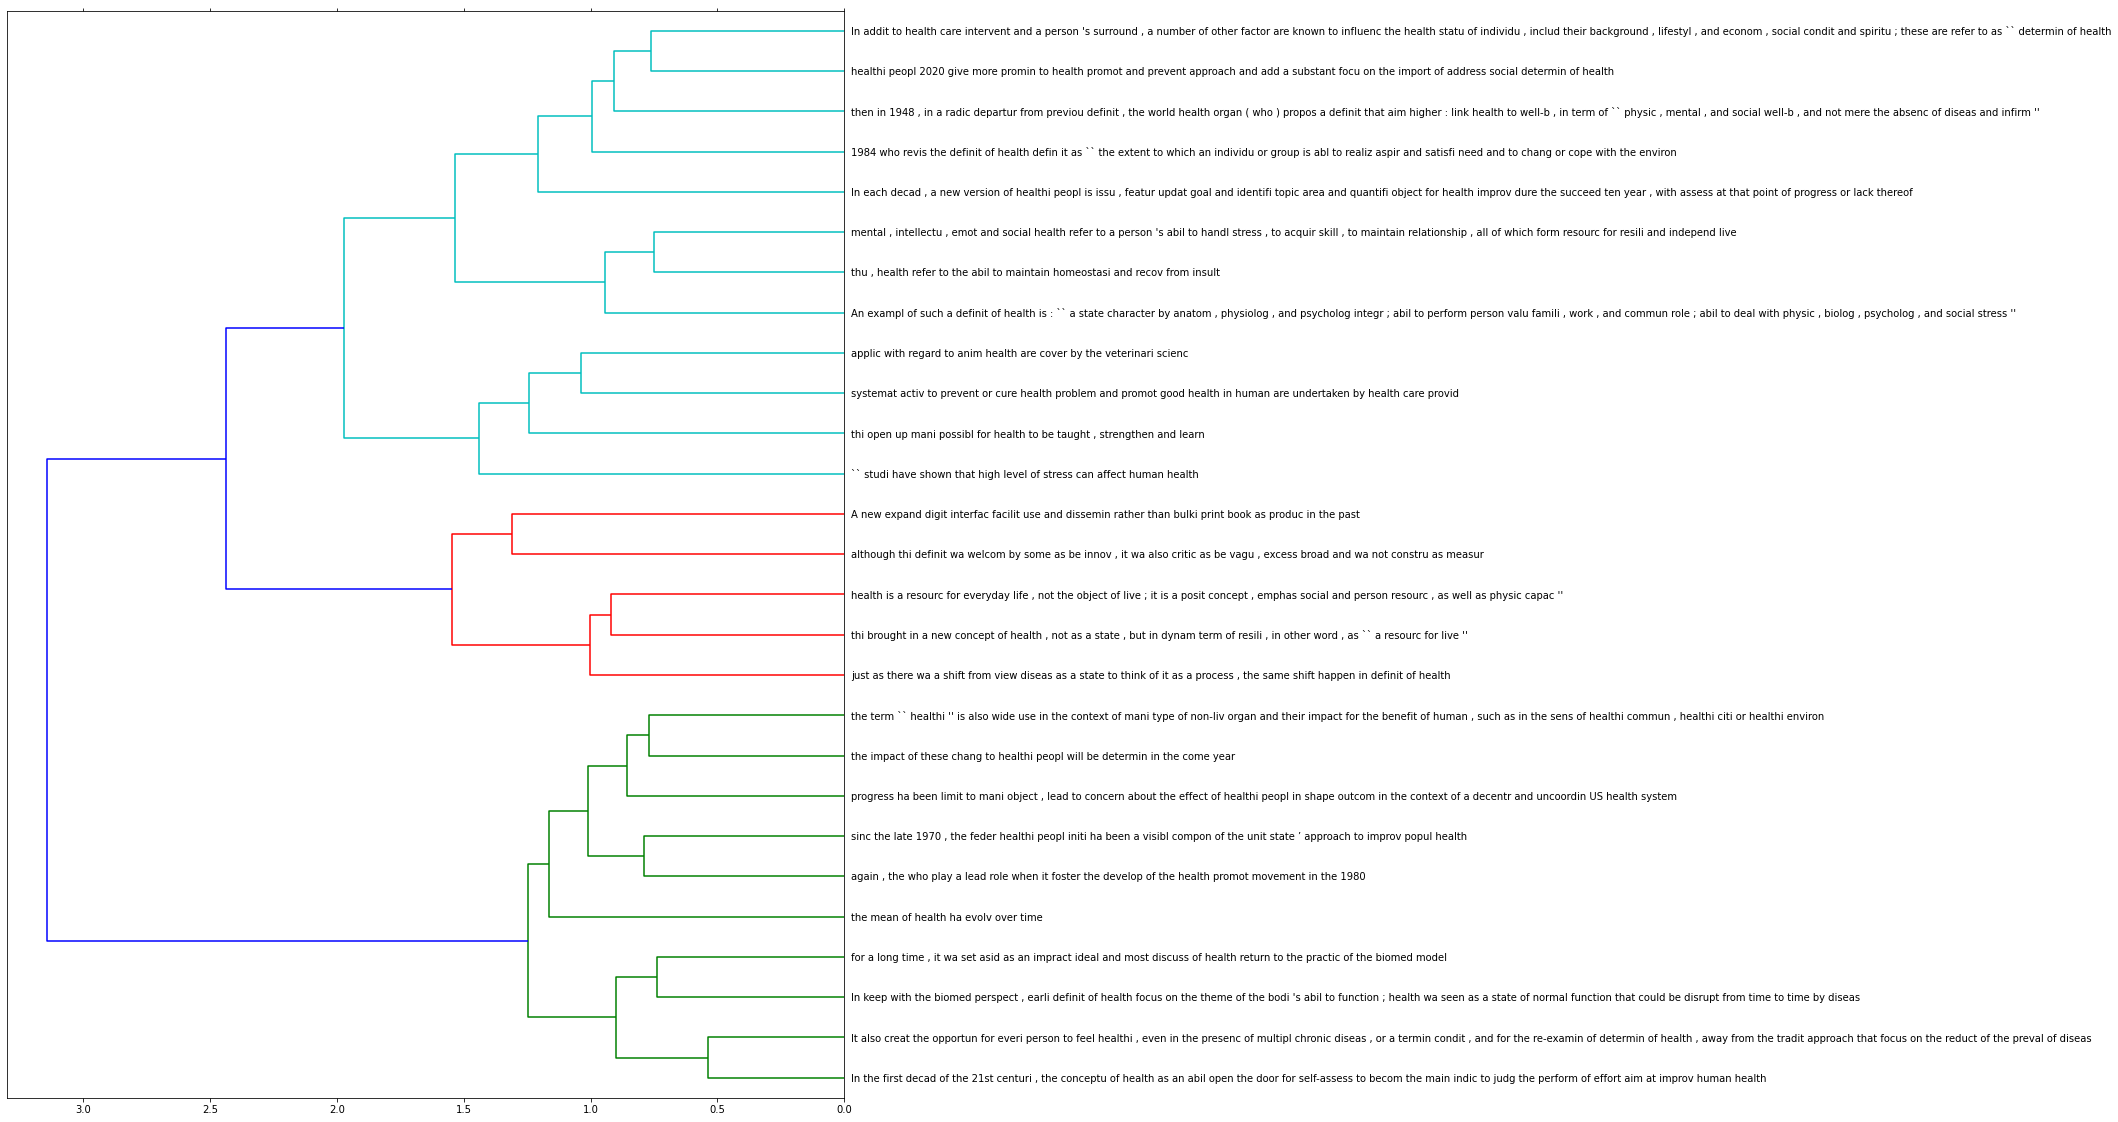

In [4]:
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="left", labels=processedSentences);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters
plt.show()

In [25]:
import plotly.figure_factory as ff

fig = ff.create_dendrogram(ward(dist), orientation='bottom', labels=processedSentences)
fig.update_layout(width=800, height=800)
fig.show()

In [8]:
sorted_centroids = kMeansCluster.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(cluster_count):
        print("\nCluster %d:" % i, end='')
        for ind in sorted_centroids[i, :10]:
            print(' %s' % terms[ind], end='')


Cluster 0: of the in and to health peopl object healthi progress
Cluster 1: the of health to in healthi time as and for
Cluster 2: to and health abil of for maintain refer person stress
Cluster 3: as wa be not critic by some thi excess measur
Cluster 4: health and of to in the are social prevent promot
Cluster 5: that affect can of studi stress have health high human
Cluster 6: as in of state health shift dynam word for term
Cluster 7: interfac use dissemin produc print expand facilit past bulki book
Cluster 8: resourc is as posit health and physic everyday social live
Cluster 9: cover by applic to are health scienc veterinari anim the

In [ ]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [ ]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

In [ ]:
for i in range(cluster_count):
    print("Cluster %d words:" % i, end='')
    for ind in sorted_centroids[i, :10]: 
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')

In [ ]:
clusters

In [7]:
####################################
# Organize Cluster Results
####################################

# Create new dictionary that tracks which cluster each sentence belongs to
# keeps copy of original sentences and stemmed sentences
# sentenceDictionary { idx: { text: String, stemmed: String, cluster: Number } }
sentenceDictionary = {}
for idx, sentence in enumerate(sentences):
	sentenceDictionary[idx] = {}
	sentenceDictionary[idx]['text'] = sentence
	sentenceDictionary[idx]['cluster'] = clusters[idx]
	sentenceDictionary[idx]['stemmed'] = processedSentences[idx]


In [ ]:
sentenceDictionary

In [17]:
# Create new dictionary that contains 1 entry for each cluster
# each key in dictionary will point to array of sentences, all of which belong to that cluster
# we attach the index to the sentenceDictionary object so we can recall the original sentence
clusterDictionary = {}
for key, sentence in sentenceDictionary.items():
	if sentence['cluster'] not in clusterDictionary:
		clusterDictionary[sentence['cluster']] = []
	clusterDictionary[sentence['cluster']].append(sentence['stemmed'])
	sentence['idx'] = len(clusterDictionary[sentence['cluster']]) - 1


In [18]:
clusterDictionary

{1: ['the mean of health ha evolv over time',
  "In keep with the biomed perspect , earli definit of health focus on the theme of the bodi 's abil to function ; health wa seen as a state of normal function that could be disrupt from time to time by diseas",
  'for a long time , it wa set asid as an impract ideal and most discuss of health return to the practic of the biomed model',
  'again , the who play a lead role when it foster the develop of the health promot movement in the 1980',
  '1984 who revis the definit of health defin it as `` the extent to which an individu or group is abl to realiz aspir and satisfi need and to chang or cope with the environ',
  'sinc the late 1970 , the feder healthi peopl initi ha been a visibl compon of the unit state ’ approach to improv popul health',
  'the impact of these chang to healthi peopl will be determin in the come year',
  "the term `` healthi '' is also wide use in the context of mani type of non-liv organ and their impact for the benef

In [19]:
sorting_cluster = sorted(clusterDictionary.items(), key=lambda kv: (len(kv[1]), kv[0]), reverse=True)

cluster_dictionary = {}
for ids, sentences_list in sorting_cluster:
    cluster_dictionary[ids] = sentences_list

In [ ]:
clusterDictionary

In [219]:
new_doc = ["there wa a shift from view diseas"]
Y = vectorizer.transform(new_doc)
prediction = kMeansCluster.predict(Y)
print(prediction)

[6]


In [22]:
remove_cluster = list(clusterDictionary.keys()) [2:]
#remove_keys = [item for item in remove_cluster if item not in prediction]
# for ids in remove_keys:
for ids in remove_cluster:    
    clusterDictionary.pop(ids)
clusterDictionary.keys()

dict_keys([1, 2])

In [38]:
####################################
# Calculate Cosine Similarity Scores
####################################

# For each cluster of sentences,
# Find the sentence with highet cosine similarity over all sentences in cluster
maxCosineScores = {}
for key, clusterSentences in clusterDictionary.items():
	maxCosineScores[key] = {}
	maxCosineScores[key]['score'] = 0
	tfidf_matrix = vectorizer.fit_transform(clusterSentences)
	cos_sim_matrix = cosine_similarity(tfidf_matrix)
	
	for idx, row in enumerate(cos_sim_matrix):
		sum = 0
		for col in row:
			sum += col
		if sum > maxCosineScores[key]['score']:
			maxCosineScores[key]['score'] = sum
			maxCosineScores[key]['idx'] = idx

In [43]:
def scorer(cos_sim_matrix):
    largest = 0
    temp_idx = 0
    for idx, row in enumerate(cos_sim_matrix):
        adder = 0
        for col in row:
            adder += col
        #print(adder)
        if adder > largest:
            larger = largest
            largest = adder
            larger_idx = temp_idx
            largest_idx = idx
            temp_idx = idx
    return larger, largest, larger_idx, largest_idx
        


In [35]:
larger_idx, largest_idx

(1, 2)

In [28]:
maxCosineScores

{1: {'score': 5.918277590744431, 'idx': 8},
 2: {'score': 2.3640776113160884, 'idx': 2}}

In [49]:
maxCosineScores1 = {}
for key, clusterSentences in clusterDictionary.items():
    maxCosineScores1[key] = {}
    maxCosineScores1[key]['score'] = 0
    tfidf_matrix = vectorizer.fit_transform(clusterSentences)
    cos_sim_matrix = cosine_similarity(tfidf_matrix)

    larger, largest, larger_idx, largest_idx = scorer(cos_sim_matrix)
    maxCosineScores1[key]['score'] = [largest, larger]
    maxCosineScores1[key]['idx'] = [largest_idx, larger_idx]
    

In [53]:
resultIndices = []
i = 0
for k, v in maxCosineScores1.items():
    cluster = k
    for items in v['idx']:
        idx = items
        for key, value in sentenceDictionary.items():
            if value['cluster'] == cluster and value['idx'] == idx:
                resultIndices.append(key)    
resultIndices.sort()
resultIndices

[1, 11, 12, 25]

In [54]:
result = ''
for idx in resultIndices:
	result += sentences[idx] + '。'
print(result)

In keeping with the biomedical perspective, early definitions of health focused on the theme of the body's ability to function; health was seen as a state of normal function that could be disrupted from time to time by disease。Thus, health referred to the ability to maintain homeostasis and recover from insults。Mental, intellectual, emotional and social health referred to a person's ability to handle stress, to acquire skills, to maintain relationships, all of which form resources for resiliency and independent living。In the first decade of the 21st century, the conceptualization of health as an ability opened the door for self-assessments to become the main indicators to judge the performance of efforts aimed at improving human health。


In [ ]:
' '.join(processedSentences).split()

In [61]:
freq_dict = Counter(' '.join(processedSentences).split())

weight = []
index = 0
for lines in result.split('。'):
    if lines:
        adder = 0
        for word in lines.split():
            adder += freq_dict[word]
        weight.append([lines, adder, index])
    index +=1

three_lines = sorted(weight, key=lambda x: x[1], reverse=True)[:3]

adder = ''
for sent, freq, index in sorted(three_lines, key=lambda x: x[2]):
    adder += sent + '. '

adder

In [66]:
weight

[["In keeping with the biomedical perspective, early definitions of health focused on the theme of the body's ability to function; health was seen as a state of normal function that could be disrupted from time to time by disease",
  477],
 ['Thus, health referred to the ability to maintain homeostasis and recover from insults',
  171],
 ["Mental, intellectual, emotional and social health referred to a person's ability to handle stress, to acquire skills, to maintain relationships, all of which form resources for resiliency and independent living",
  292],
 ['In the first decade of the 21st century, the conceptualization of health as an ability opened the door for self-assessments to become the main indicators to judge the performance of efforts aimed at improving human health',
  568]]

In [47]:
maxCosineScores1

{1: {'score': [5.918277590744431, 5.2258379436828735], 'idx': [8, 1]},
 2: {'score': [2.3640776113160884, 2.2028437829565943], 'idx': [2, 1]}}

In [227]:
ranker = []
for key, value in maxCosineScores.items():
    if key == prediction[0]:
        predict = [key, value['score'], value['idx']]
    else:
        ranker.append([key, value['score'], value['idx']])

rank = sorted(ranker, key=lambda l:l[1], reverse=True)[:2]
rank = rank + [predict]

score_dict = {}
for cluster_id, score, ids in rank:
    score_dict[cluster_id] = {}
    score_dict[cluster_id]['score'] = score
    score_dict[cluster_id]['idx'] = idx

score_dict

In [241]:
####################################
# Construct Document Summary
####################################	

# for every cluster's max cosine score,
# find the corresponding original sentence
resultIndices = []
i = 0
for key, value in maxCosineScores.items():
	cluster = key
	idx = value['idx']
	stemmedSentence = clusterDictionary[cluster][idx]
	# key corresponds to the sentences index of the original document
	# we will use this key to sort our results in order of original document
	for key, value in sentenceDictionary.items():
		if value['cluster'] == cluster and value['idx'] == idx:
			resultIndices.append(key)
resultIndices.sort()

# Iterate over sentences and construct summary output
result = ''
for idx in resultIndices:
	result += sentences[idx] + '。'
print(result)

Although this definition was welcomed by some as being innovative, it was also criticized as being vague, excessively broad and was not construed as measurable。Just as there was a shift from viewing disease as a state to thinking of it as a process, the same shift happened in definitions of health。Mental, intellectual, emotional and social health referred to a person's ability to handle stress, to acquire skills, to maintain relationships, all of which form resources for resiliency and independent living。In addition to health care interventions and a person's surroundings, a number of other factors are known to influence the health status of individuals, including their background, lifestyle, and economic, social conditions and spirituality; these are referred to as "determinants of health。In the first decade of the 21st century, the conceptualization of health as an ability opened the door for self-assessments to become the main indicators to judge the performance of efforts aimed at 

In [258]:
'\n'.join(result.split('。'))

'Although this definition was welcomed by some as being innovative, it was also criticized as being vague, excessively broad and was not construed as measurable\nJust as there was a shift from viewing disease as a state to thinking of it as a process, the same shift happened in definitions of health\nMental, intellectual, emotional and social health referred to a person\'s ability to handle stress, to acquire skills, to maintain relationships, all of which form resources for resiliency and independent living\nIn addition to health care interventions and a person\'s surroundings, a number of other factors are known to influence the health status of individuals, including their background, lifestyle, and economic, social conditions and spirituality; these are referred to as "determinants of health\nIn the first decade of the 21st century, the conceptualization of health as an ability opened the door for self-assessments to become the main indicators to judge the performance of efforts ai

In [263]:
from gensim.summarization.summarizer import summarize 
# Summary (0.5% of the original content). 
summ_per = summarize('\n'.join(result.split('。')), ratio = 0.5) 
print("Percent summary") 
print(summ_per) 

Percent summary
Mental, intellectual, emotional and social health referred to a person's ability to handle stress, to acquire skills, to maintain relationships, all of which form resources for resiliency and independent living
In addition to health care interventions and a person's surroundings, a number of other factors are known to influence the health status of individuals, including their background, lifestyle, and economic, social conditions and spirituality; these are referred to as "determinants of health
